# ***Installing ALL Required Packages***


In [ ]:
# Installing Eequired External Packages
!pip install pennylane
! pip install -Uq kaggle
! pip install -Uq fastai==2.2.5
!pip install --upgrade torch
!pip install split-folders
!pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
 

# ***Importing All Necessary Packages***

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Dropout , BatchNormalization
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
import pandas as pd
import cv2
import os

import numpy as np
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.models import load_model
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from skimage import color
from skimage import io
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
import splitfolders
import ipyplot

## ***Uploading Kaggle.json file key to access kaggle API***

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kp2000","key":"abde134f3a9d8b917a4a4028149bc7a0"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


## ***Downloading Planets dataset***

In [ ]:
! kaggle datasets download nikitarom/planets-dataset

planets-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip planets-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additional/test-jpg-additional/fi

In [ ]:
from fastai.vision.all import *
path = Path('./planet/planet')

## ***Data Pre-Processing***

In [ ]:
labels = pd.read_csv(path/'train_classes.csv')

In [ ]:
labels.tags = labels.tags.apply(lambda x: 'remove' if 'cloudy' in x else x)
labels.tags = labels.tags.apply(lambda x: 'remove' if 'partly_cloudy' in x else x)
labels.tags = labels.tags.apply(lambda x: 'remove' if 'haze' in x else x)

In [ ]:
labels = labels[~labels['tags'].isin(['remove'])]

In [ ]:
labels.tags = labels.tags.apply(lambda x: 'Detected_Deforestation' if 'agriculture' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Detected_Deforestation' if 'selective_logging' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Detected_Deforestation' if 'artisinal_mine' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Detected_Deforestation' if 'conventional_mine' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Detected_Deforestation' if 'cultivation' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Detected_Deforestation' if 'road' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Detected_Deforestation' if 'slash_burn' in x else x)

In [ ]:
labels.tags = labels.tags.apply(lambda x: 'Forest' if 'clear' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Forest' if 'primary' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Forest' if 'water' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Forest' if 'bare_ground' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Forest' if 'blooming' in x else x)
labels.tags = labels.tags.apply(lambda x: 'Forest' if 'habitation' in x else x)

In [ ]:
labels.nunique()

image_name    28432
tags              2
dtype: int64

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28432 entries, 1 to 40477
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  28432 non-null  object
 1   tags        28432 non-null  object
dtypes: object(2)
memory usage: 666.4+ KB


In [ ]:
labels.tags[labels.tags == 'Detected_Deforestation'] = 1
labels.tags[labels.tags == 'Forest'] = 0
labels = labels.reset_index()
print(labels)

       index   image_name tags
0          1      train_1    1
1          2      train_2    0
2          3      train_3    0
3          4      train_4    1
4          6      train_6    1
...      ...          ...  ...
28427  40472  train_40472    1
28428  40473  train_40473    1
28429  40474  train_40474    0
28430  40476  train_40476    1
28431  40477  train_40477    1

[28432 rows x 3 columns]


In [ ]:
images = []
classes = []
im = []
lab = []
for i in tqdm(range(len(labels))):
    img = tf.keras.utils.load_img('/content/planet/planet/train-jpg/'+labels['image_name'][i]+'.jpg',target_size=(224,224))
    im.append(img)
    lab.append(labels['tags'][i])
    img = tf.keras.utils.img_to_array(img)
    img = img/255
    images.append(img)
    classes.append(labels['tags'][i])
    if len(images)==1000:
      break

  4%|▎         | 999/28432 [00:02<01:04, 425.08it/s]


/usr/local/lib/python3.7/dist-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



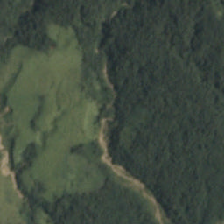
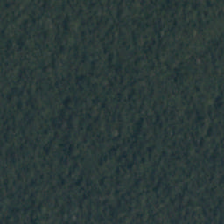
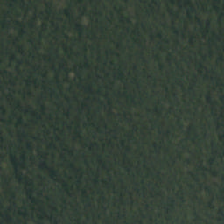
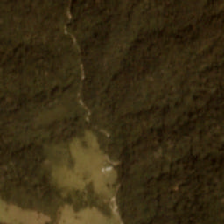
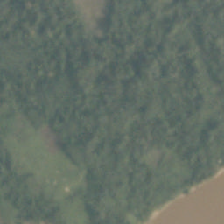
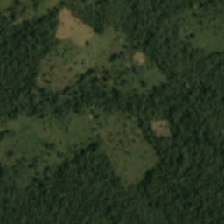
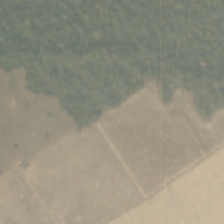
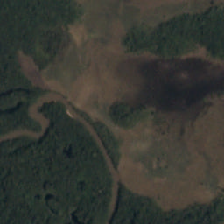
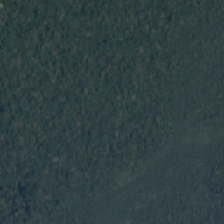
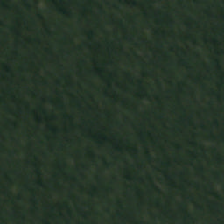
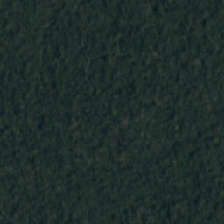
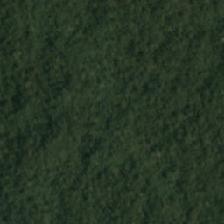


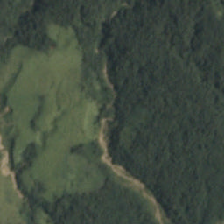
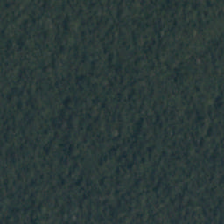
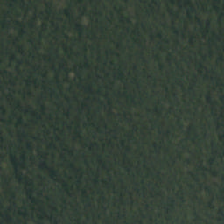
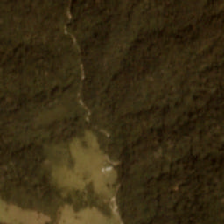
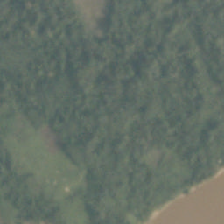
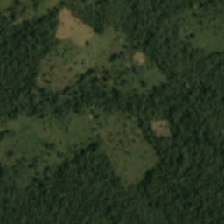
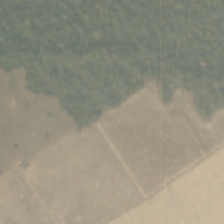
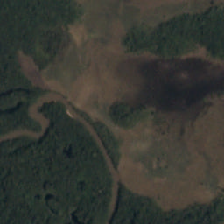
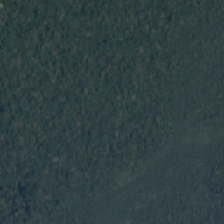
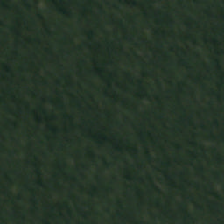
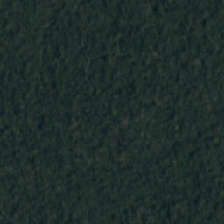
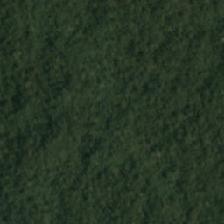

In [ ]:
ipyplot.plot_images(im,lab, max_images=12, img_width=150)

In [ ]:
images = np.array(images)
images = images.astype(np.float32)

In [ ]:
images.shape

(1000, 224, 224, 3)

In [ ]:
classes = np.array(classes)
classes = classes.astype(np.float32)

In [ ]:
classes.shape

(1000,)

In [ ]:
classes = np.array(classes)
classes = classes.astype(np.float32)

In [ ]:
images_Q = []
classes_Q = []
for i in tqdm(range(len(labels))):
    img = tf.keras.utils.load_img('/content/planet/planet/train-jpg/'+labels['image_name'][i]+'.jpg',target_size=(64,64))
    img = tf.keras.utils.img_to_array(img)
    img = img/255
    images_Q.append(img)
    classes_Q.append(labels['tags'][i])
    if len(images_Q)==1000:
      break

  4%|▎         | 999/28432 [00:02<00:57, 474.71it/s]


In [ ]:
images_Q = np.array(images_Q)
images_Q = images_Q.astype(np.float32)
classes_Q = np.array(classes_Q)
classes_Q = classes_Q.astype(np.float32)

In [ ]:
final_dataset = []
for img in images_Q:
  img = img[:,:,0]
  final_dataset.append(img)
final_dataset = np.array(final_dataset) 

In [ ]:
final_dataset.shape

(1000, 64, 64)

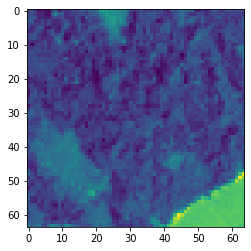

In [ ]:
plt.imshow(final_dataset[4])

# **Q - C Approach**

## ***Train-Test-Split for Classical Model***

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(images, classes, random_state=64,test_size=0.5)
X_valid,X_test,y_valid,y_test = train_test_split(X_rem,y_rem,random_state=64,test_size =0.2)

In [ ]:
# Before SMOTE
count = Counter(y_train)
print(count)

Counter({0.0: 303, 1.0: 197})


In [ ]:
# Using SMOTE with sampling_strategy = 0.8 for over sampling
oversampling = SMOTE(sampling_strategy=0.8)
X_train,y_train = oversampling.fit_resample(X_train.reshape(X_train.shape[0], -1),y_train)
X_train = X_train.reshape(X_train.shape[0], 224, 224,3)

In [ ]:
# After SMOTE
count = Counter(y_train)
print(count)


Counter({0.0: 303, 1.0: 242})


## ***Building CNN Model From Scratch***

In [ ]:
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3),padding = "same",activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=16, kernel_size=(3, 3),padding = "same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_140 (Ba  (None, 56, 56, 16)       64        
 tchNormalization)                                               
                                                     

### ***Compile & Fit the training data to the model***

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['accuracy'])

In [ ]:
Forest_def = model
save_model = ModelCheckpoint('Forest_Deforestation.h5', monitor='val_accuracy',verbose=1, save_best_only=True, save_weights_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = Forest_def.fit(X_train,y_train,epochs = 50,batch_size = 32, validation_data = (X_valid, y_valid), callbacks=[save_model])

Epoch 1/50
16/18 [=========================>....] - ETA: 0s - loss: 0.2276 - accuracy: 0.6699
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to Forest_Deforestation.h5
18/18 [==============================] - 2s 51ms/step - loss: 0.2260 - accuracy: 0.6734 - val_loss: 0.2430 - val_accuracy: 0.7000
Epoch 2/50
16/18 [=========================>....] - ETA: 0s - loss: 0.2029 - accuracy: 0.6934
Epoch 2: val_accuracy did not improve from 0.70000
18/18 [==============================] - 0s 28ms/step - loss: 0.2029 - accuracy: 0.6936 - val_loss: 0.2389 - val_accuracy: 0.5875
Epoch 3/50
16/18 [=========================>....] - ETA: 0s - loss: 0.1897 - accuracy: 0.7441
Epoch 3: val_accuracy did not improve from 0.70000
18/18 [==============================] - 0s 28ms/step - loss: 0.1878 - accuracy: 0.7431 - val_loss: 0.2377 - val_accuracy: 0.5850
Epoch 4/50
16/18 [=========================>....] - ETA: 0s - loss: 0.2031 - accuracy: 0.7227
Epoch 4: val_accuracy did not improve f

### ***Calculating all Evaluation metrics***

In [ ]:
# calculating Training and Testing accuracy
acc1 = Forest_def.evaluate(X_test, y_test, verbose=0)
acc2 = Forest_def.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: %.2f%%" % (acc2[1]*100))
print("Testing Accuracy: %.2f%%" % (acc1[1]*100))

Training Accuracy: 94.31%
Testing Accuracy: 83.00%


In [ ]:
# saving model history to a .nopy file using np.save
np.save('F_D.npy', Forest_def.history.history)
# loading the saved history from a .npy file using np.load
Forest_def_history = np.load('F_D.npy', allow_pickle='TRUE').item()

### ***Plotting the Loss, Accuracy, Val_Accuracy, Val_accuracy on a single chart***

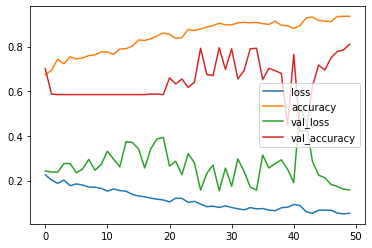

In [ ]:
# visualizing the loss,val_loss,accuracy and val_accuracy on a single graph
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
# predicting probabilities for the test set
y_prob = Forest_def.predict(X_test, verbose=0)
# converting the probabilites into 1's and 0's
y_prob = (y_prob>0.5).astype(np.float32)
y_prob = y_prob[:, 0]

In [ ]:
# calculating Precision, Recall, F1 Score and AUC
precision = precision_score(y_test, y_prob)
recall = recall_score(y_test, y_prob)
f1 = f1_score(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
# getting a confusion matrix
confusion_m = confusion_matrix(y_test, y_prob)
# Printing all the Evalution Metrics
print(confusion_m)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)
print('ROC AUC: %f' % auc)

[[43 11]
 [ 6 40]]
Precision: 0.784314
Recall: 0.869565
F1 score: 0.824742
ROC AUC: 0.832931


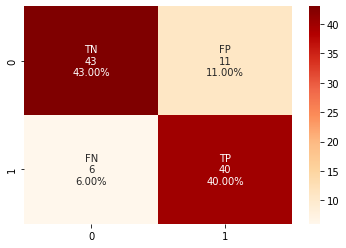

In [ ]:
names = ['TN','FP','FN','TP']
counts = ["{0:0.0f}".format(value) for value in confusion_m.flatten()]
percents = ["{0:.2%}".format(value) for value in confusion_m.flatten()/np.sum(confusion_m)]
lab = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(names,counts,percents)]
lab = np.asarray(lab).reshape(2,2)
sns.heatmap(confusion_m, annot=lab, fmt='', cmap='OrRd')
plt.show()

##***Hybrid Quantum Classical Model***



### ***Quantum Preprocessing of the Dataset***

In [ ]:
q_epochs = 30           # number of epochs for the quantum model
q_layers = 1            # number of layers
n = 1000                 # dataset size for quantum preprocessing
PREPROCESS = False      # If False, directly loads the data from the files, skipping the quatum preprocessing step
np.random.seed(0)       
tf.random.set_seed(0) 

In [ ]:
Q_final_dataset = final_dataset
Q_final_dataset = np.array(Q_final_dataset[..., tf.newaxis])
Q_labels = classes_Q

### ***Intializing The Quantum Device***

In [ ]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(q_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

### ***Defining a quantum circuit as shown in Pennylane***

In [ ]:
def quanv(image):
    output = np.zeros((32,32,4))
    # Looping over the certain pixel portions of a 224 X 224 forest image
    for j in range(0, 64, 2):
        for k in range(0, 64, 2):
            # processing a 224 X 224 image through a quantum circuit
            q_results = circuit([image[j, k, 0],image[j, k + 1, 0],image[j + 1, k, 0],image[j + 1, k + 1, 0]])
            # assigning values to four channels of the output image
            for c in range(4):
                output[j // 2, k // 2, c] = q_results[c]
    return output


In [ ]:
# Path to save the pre-processed images
SAVE_PATH = "/content/"

In [ ]:
# looping over the final dataset to preprocess images using quanv() function and appending each image to a list Q_images
if PREPROCESS == True:
    Q_images = []
    print("The images are being preprocessed with the quantum circuit built in the previous code cell")
    for idx, img in enumerate(Q_final_dataset):
        Q_images.append(quanv(img))
        # Converting list to numpy array
        # Saving
        np.save(SAVE_PATH + "Q_images.npy", Q_images)
else:       
   # Loading
   Q_images = np.load(SAVE_PATH + "Q_images.npy")

In [ ]:
Q_images = np.asarray(Q_images)

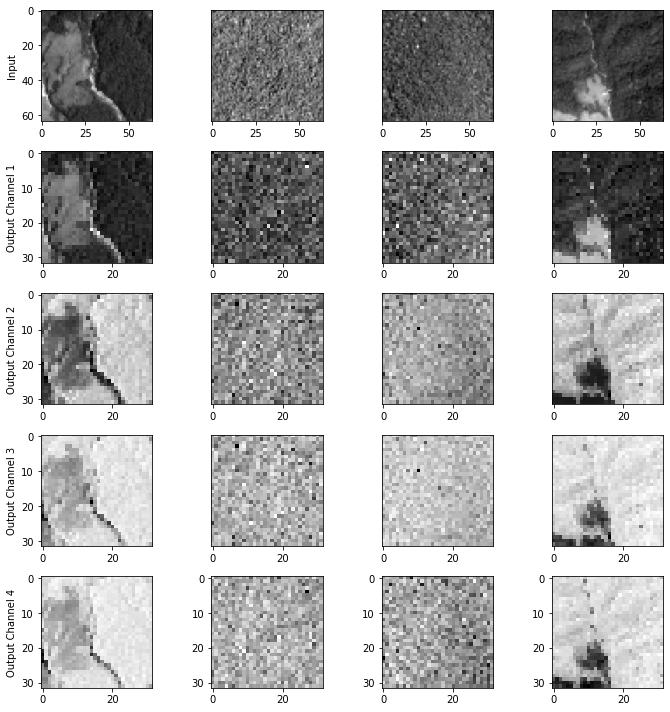

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
for a in range(4):
    if a != 0:
        axes[0, a].yaxis.set_visible(False)
    axes[0, a].imshow(Q_final_dataset[a, :, :, 0], cmap="gray")
    for b in range(4):
        if a != 0:
            axes[b, a].yaxis.set_visible(False)
        axes[b + 1, a].imshow(Q_images[a, :, :, b], cmap="gray")

axes[0, 0].set_ylabel("Input")
axes[1, 0].set_ylabel("Output Channel 1")
axes[2, 0].set_ylabel("Output Channel 2")
axes[3, 0].set_ylabel("Output Channel 3")
axes[4, 0].set_ylabel("Output Channel 4")

plt.tight_layout()
plt.show()

### ***Training Classical AI Model with Quantum Preprocessed Data***

In [ ]:
Q_train, X_rem, Q_train_labels, y_rem = train_test_split(Q_images, Q_labels, random_state=64, test_size=0.5)
Q_valid,Q_test,Q_valid_labels,Q_test_labels = train_test_split(X_rem,y_rem,random_state=64,test_size =0.2)

In [ ]:
# Using SMOTE with sampling_strategy = 0.8 for over sampling
oversampling = SMOTE(sampling_strategy=0.8)
Q_train,Q_train_labels = oversampling.fit_resample(Q_train.reshape(Q_train.shape[0], -1), Q_train_labels)
Q_train = Q_train.reshape(Q_train.shape[0], 32, 32, 4)

In [ ]:
Q_train.shape

(545, 32, 32, 4)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3),padding = "same",activation="relu", input_shape=Q_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=16, kernel_size=(3, 3),padding = "same",activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 32, 32, 16)        592       
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 batch_normalization_152 (Ba  (None, 8, 8, 16)         64        
 tchNormalization)                                               
                                                     

In [ ]:
Q_Forest_def = model

In [ ]:
Q_Forest_def.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['accuracy'])

In [ ]:
save_model = ModelCheckpoint('Forest_Deforestation_Quantum.h5', monitor='val_accuracy',verbose=1, save_best_only=True, save_weights_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
Q_history = Q_Forest_def.fit(Q_train,Q_train_labels,epochs = 50,batch_size=32, validation_data = (Q_valid, Q_valid_labels),callbacks=[save_model])

Epoch 1/50
10/18 [===============>..............] - ETA: 0s - loss: 0.2606 - accuracy: 0.5844 
Epoch 1: val_accuracy improved from -inf to 0.58500, saving model to Forest_Deforestation_Quantum.h5
18/18 [==============================] - 2s 24ms/step - loss: 0.2485 - accuracy: 0.6147 - val_loss: 0.2438 - val_accuracy: 0.5850
Epoch 2/50
10/18 [===============>..............] - ETA: 0s - loss: 0.2276 - accuracy: 0.6594
Epoch 2: val_accuracy did not improve from 0.58500
18/18 [==============================] - 0s 9ms/step - loss: 0.2262 - accuracy: 0.6569 - val_loss: 0.2356 - val_accuracy: 0.5850
Epoch 3/50
10/18 [===============>..............] - ETA: 0s - loss: 0.1868 - accuracy: 0.7437
Epoch 3: val_accuracy did not improve from 0.58500
18/18 [==============================] - 0s 9ms/step - loss: 0.1835 - accuracy: 0.7541 - val_loss: 0.2249 - val_accuracy: 0.5850
Epoch 4/50
10/18 [===============>..............] - ETA: 0s - loss: 0.2015 - accuracy: 0.7281
Epoch 4: val_accuracy improved f

In [ ]:
# Save model history to .npy file
np.save('F_D_Q.npy', Q_Forest_def.history.history)
# Load model history from .npy file
Quantum_model_history = np.load('F_D_Q.npy', allow_pickle='TRUE').item()

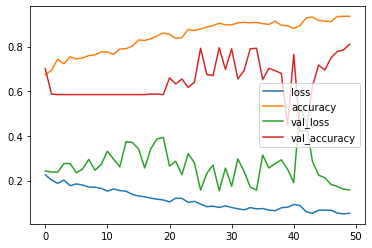

In [ ]:
# plotting loss, validation_loss, accuracy and validation_accuracy on the same plot
pd.DataFrame(history.history).plot()
plt.show()

### ***Calculating all Evaluation Metrics***

In [ ]:
# Calculating Testing Accuracy
a1 = Q_Forest_def.evaluate(Q_test, Q_test_labels, verbose=0)
a2 = Q_Forest_def.evaluate(Q_train, Q_train_labels, verbose=0)
print("Training Accuracy: %.2f%%" % (a2[1]*100))
print("Testing Accuracy: %.2f%%" % (a1[1]*100))

Training Accuracy: 93.21%
Testing Accuracy: 84.00%


In [ ]:
# predicting target clases for test set
Q_yhat_probs = Q_Forest_def.predict(Q_test, verbose=0)
# converting the predicted probabilities into 1's and 0's
Q_yhat_probs = (Q_yhat_probs>0.5).astype(np.float32)
Q_yhat_probs = Q_yhat_probs[:, 0]

In [ ]:
# Calculating Precision,Recall,F1 Score and Accuracy
Q_precision = precision_score(Q_test_labels, Q_yhat_probs)
Q_recall = recall_score(Q_test_labels, Q_yhat_probs)
Q_f1 = f1_score(Q_test_labels, Q_yhat_probs)
Q_auc = roc_auc_score(Q_test_labels, Q_yhat_probs)
# Confusion Matrix
Q_confusion_matrix = confusion_matrix(Q_test_labels, Q_yhat_probs)
# Printing all the Evalution Metrics
print(Q_confusion_matrix)
print('Precision(Q): %f' % Q_precision)
print('Recall(Q): %f' % Q_recall)
print('F1 score (Q): %f' % Q_f1)
print('ROC AUC (Q): %f' % Q_auc)

[[48  6]
 [10 36]]
Precision(Q): 0.857143
Recall(Q): 0.782609
F1 score (Q): 0.818182
ROC AUC (Q): 0.835749


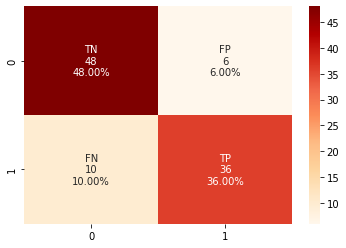

In [ ]:
names = ['TN','FP','FN','TP']
counts = ["{0:0.0f}".format(value) for value in Q_confusion_matrix.flatten()]
percents = ["{0:.2%}".format(value) for value in Q_confusion_matrix.flatten()/np.sum(Q_confusion_matrix)]
lab = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(names,counts,percents)]
lab = np.asarray(lab).reshape(2,2)
sns.heatmap(Q_confusion_matrix, annot=lab, fmt='', cmap='OrRd')
plt.show()

# **C - Q Approach**

## ***Transfer Learning***

In [ ]:
# Importing all necessary packages
import time
import os
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm
import pennylane as qml
from pennylane import numpy as np
torch.manual_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
os.environ["OMP_NUM_THREADS"] = "1"
from copy import deepcopy

In [ ]:
# Creating class_1 subfolder
os.makedirs('Pytorch_data/class_1')

In [ ]:
# creating class_0 subfolder
os.makedirs('Pytorch_data/class_0')

In [ ]:
# creating two empty lists class_1 and class_0
# looping through the dataset and appending images belonging to class 1 to class_1 and class 0 to class_0
class_1 = []
class_0 = []
for i in tqdm(range(1000)):
   if labels['tags'][i] == 1:
    img = tf.keras.utils.load_img('/content/planet/planet/train-jpg/'+labels['image_name'][i]+'.jpg',target_size=(224,224,1))
    img = tf.keras.utils.img_to_array(img)
    class_1.append(img)
    cv2.imwrite('/content/Pytorch_data/class_1/'+labels['image_name'][i]+'.jpg',img)
   else:
    img = tf.keras.utils.load_img('/content/planet/planet/train-jpg/'+labels['image_name'][i]+'.jpg',target_size=(224,224,1))
    img = tf.keras.utils.img_to_array(img)
    class_0.append(img)
    cv2.imwrite('/content/Pytorch_data/class_0/'+labels['image_name'][i]+'.jpg',img)


100%|██████████| 1000/1000 [00:03<00:00, 309.96it/s]


In [ ]:
# using the splitfolders function to divide the folder into train, val and test subfolders in 0.5,0.3,0.2 ratios respectively
input_folder = '/content/Pytorch_data'
splitfolders.ratio(input_folder,output="Train_Val",seed=42,ratio=(.6,.4),group_prefix=None)

Copying files: 1000 files [00:00, 9063.45 files/s]


In [ ]:
batch_size = 4

In [ ]:
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(224),     # data augmentation
            transforms.RandomHorizontalFlip(),     # data augmentation
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            # Normalizing
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "/content/Train_Val"
image_datasets = {
    x if x == "train" else "val": datasets.ImageFolder(
        os.path.join(data_dir, x), data_transforms[x]
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes

# Initialize dataloader
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True)
    for x in ["train", "val"]
}

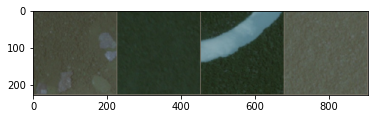

In [ ]:
# iterating over the validation data in dataloaders to extract inputs nad classes
inputs, classes = next(iter(dataloaders["val"]))
# visualizing a batch of the data
out = torchvision.utils.make_grid(inputs)
#transposing the images
out = out.numpy().transpose((1, 2, 0))
# Reversing back to the images before normalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
out = std * out + mean
out = np.clip(out, 0, 1)
# displaying images
plt.imshow(out)

### ***Classical Transfer Learning***

In [ ]:
def metrics(confusion_matrix):
  test_accuracy = confusion_matrix.diag(0).sum()/confusion_matrix.sum()
  precision = (confusion_matrix[1][1]/confusion_matrix.sum(0)[1])
  recall = (confusion_matrix[1][1]/confusion_matrix[1].sum())
  f1_score = 2*((precision*recall)/(precision+recall))
  sensitivity = (confusion_matrix[1][1])/(confusion_matrix[1][0]+confusion_matrix[1][1])
  specificity = (confusion_matrix[0][0])/(confusion_matrix[0][0]+confusion_matrix[0][1])
  auc = (sensitivity + specificity)/2
  return print(confusion_matrix),print("Testing Accuracy: %.2f%%" % (test_accuracy*100)),print("Precision:",precision.numpy()),print("Recall:",recall.numpy()),print("F1 Score:",f1_score.numpy()),print("AUC:",auc.numpy())


In [ ]:
def eval_metrics(model):
  confusion_matrix = torch.zeros(2,2)
  with torch.no_grad():
      for i, (inputs, classes) in enumerate(dataloaders['val']):
          inputs = inputs.to(device)
          classes = classes.to(device)
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          for t, p in zip(classes.view(-1), preds.view(-1)):
                  confusion_matrix[t.long(), p.long()] += 1
  return  metrics(confusion_matrix)



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since_time = time.time()
    best_weights = copy.deepcopy(model.state_dict())
    best_accuracy = 0.0
    best_loss = 10000.0  
    best_accuracy_train = 0.0
    best_loss_train = 10000.0 
    print("Training started:")

    for epoch in range(num_epochs):

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                # Set model to training mode
                model.train()
            else:
                # Set model to evaluate mode
                model.eval()
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            n_batches = dataset_sizes[phase] // batch_size
            it = 0
            for inputs, labels in dataloaders[phase]:
                since_time_batch = time.time()
                batch_size_ = len(inputs)
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()

                # Track/compute gradient and make an optimization step only when training
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Print iteration results
                running_loss += loss.item() * batch_size_
                batch_corrects = torch.sum(preds == labels.data).item()
                running_corrects += batch_corrects
                print(
                    "Phase: {} Epoch: {}/{} Iter: {}/{} Batch time: {:.4f}".format(
                        phase,
                        epoch + 1,
                        num_epochs,
                        it + 1,
                        n_batches + 1,
                        time.time() - since_time_batch,
                    ),
                    end="\r",
                    flush=True,
                )
                it += 1

            # Print epoch results
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            print(
                "Phase: {} Epoch: {}/{} Loss: {:.4f} Acc: {:.4f}        ".format(
                    "train" if phase == "train" else "val",
                    epoch + 1,
                    num_epochs,
                    epoch_loss,
                    epoch_acc,
                )
            )

            # Check if this is the best model wrt previous epochs
            if phase == "val" and epoch_acc > best_accuracy:
                best_accuracy = epoch_acc
                best_weights = copy.deepcopy(model.state_dict())
            if phase == "val" and epoch_loss < best_loss:
                best_loss = epoch_loss
            if phase == "train" and epoch_acc > best_accuracy_train:
                best_accuracy_train = epoch_acc
            if phase == "train" and epoch_loss < best_loss_train:
                best_loss_train = epoch_loss

            # Update learning rate
            if phase == "train":
                scheduler.step()

    # Print final results
    model.load_state_dict(best_weights)
    time_elapsed = time.time() - since_time
    print(
        "Training completed in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60)
    )
    print("Best Training Loss: {:.4f} | Best Training Accuracy: {:.4f}".format(best_loss_train, best_accuracy_train))
    print("Best Validation Loss: {:.4f} | Best validation Accuracy: {:.4f}".format(best_loss, best_accuracy))
    return model

#### **Resnet18**

In [ ]:
resnet = torchvision.models.resnet18(pretrained=True)

num_ftrs = resnet.fc.in_features
# Here the output targets is set to 2 as the we have two classes class_1 and class_0
resnet.fc = nn.Linear(num_ftrs, 2)
resnet = resnet.to(device)
# setting the criterion
criterion = nn.CrossEntropyLoss()
# optimizer Adam with a learning rate of 0.0004
optimizer_ft = optim.Adam(resnet.parameters(), lr=0.0004)
# Decay LR every 10 epochs i.e. step size and with factor 0.1 i.e. gamma
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

In [ ]:
resnet = train_model(resnet, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.6884 Acc: 0.6895        
Phase: val Epoch: 1/30 Loss: 0.4190 Acc: 0.8229        
Phase: train Epoch: 2/30 Loss: 0.5248 Acc: 0.7629        
Phase: val Epoch: 2/30 Loss: 0.5437 Acc: 0.7855        
Phase: train Epoch: 3/30 Loss: 0.5300 Acc: 0.7312        
Phase: val Epoch: 3/30 Loss: 0.4721 Acc: 0.7756        
Phase: train Epoch: 4/30 Loss: 0.4875 Acc: 0.7913        
Phase: val Epoch: 4/30 Loss: 0.9505 Acc: 0.8354        
Phase: train Epoch: 5/30 Loss: 0.4762 Acc: 0.8063        
Phase: val Epoch: 5/30 Loss: 0.9195 Acc: 0.8628        
Phase: train Epoch: 6/30 Loss: 0.4777 Acc: 0.7930        
Phase: val Epoch: 6/30 Loss: 0.4645 Acc: 0.7980        
Phase: train Epoch: 7/30 Loss: 0.4538 Acc: 0.8197        
Phase: val Epoch: 7/30 Loss: 0.5478 Acc: 0.8479        
Phase: train Epoch: 8/30 Loss: 0.4423 Acc: 0.8264        
Phase: val Epoch: 8/30 Loss: 0.4326 Acc: 0.7905        
Phase: train Epoch: 9/30 Loss: 0.4224 Acc: 0.8414        
Phase: val E

In [ ]:
eval_metrics(resnet)

tensor([[208.,  29.],
        [ 15., 149.]])
Testing Accuracy: 89.03%
Precision: 0.83707863
Recall: 0.9085366
F1 Score: 0.87134504
AUC: 0.8930869


(None, None, None, None, None, None)

In [ ]:
confusion_matrix = torch.zeros(2,2)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
          inputs = inputs.to(device)
          classes = classes.to(device)
          outputs = resnet(inputs)
          _, preds = torch.max(outputs, 1)
          for t, p in zip(classes.view(-1), preds.view(-1)):
                  confusion_matrix[t.long(), p.long()] += 1

####**VGG16**

In [ ]:
vgg16 = torchvision.models.vgg16(pretrained=True)

num_ftrs = 25088
# Here the output targets is set to 2 as the we have two classes class_1 and class_0
vgg16.classifier = nn.Linear(num_ftrs, 2)
vgg16 = vgg16.to(device)

# setting the criterion
criterion = nn.CrossEntropyLoss()
# optimizer Adam with a learning rate of 0.0004
optimizer_vgg16 = optim.Adam(vgg16.parameters(), lr=0.0004)
# Decay LR every 10 epochs i.e. step size and with factor 0.1 i.e. gamma
exp_lr_scheduler_vgg16 = lr_scheduler.StepLR(optimizer_vgg16, step_size=10, gamma=0.1)

In [ ]:
vgg16.classifier

Linear(in_features=25088, out_features=2, bias=True)

In [ ]:
vgg16 = train_model(vgg16, criterion, optimizer_vgg16, exp_lr_scheduler_vgg16,num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.7415 Acc: 0.6110        
Phase: val Epoch: 1/30 Loss: 0.6390 Acc: 0.7332        
Phase: train Epoch: 2/30 Loss: 0.6652 Acc: 0.6344        
Phase: val Epoch: 2/30 Loss: 0.6052 Acc: 0.6534        
Phase: train Epoch: 3/30 Loss: 0.6509 Acc: 0.6528        
Phase: val Epoch: 3/30 Loss: 0.6351 Acc: 0.7357        
Phase: train Epoch: 4/30 Loss: 0.8661 Acc: 0.6594        
Phase: val Epoch: 4/30 Loss: 0.8150 Acc: 0.6384        
Phase: train Epoch: 5/30 Loss: 0.7056 Acc: 0.6511        
Phase: val Epoch: 5/30 Loss: 0.6602 Acc: 0.5910        
Phase: train Epoch: 6/30 Loss: 0.6941 Acc: 0.6344        
Phase: val Epoch: 6/30 Loss: 0.6404 Acc: 0.5910        
Phase: train Epoch: 7/30 Loss: 0.6771 Acc: 0.5943        
Phase: val Epoch: 7/30 Loss: 0.5956 Acc: 0.7132        
Phase: train Epoch: 8/30 Loss: 0.6173 Acc: 0.6828        
Phase: val Epoch: 8/30 Loss: 0.6866 Acc: 0.7207        
Phase: train Epoch: 9/30 Loss: 0.6056 Acc: 0.6945        
Phase: val E

In [ ]:
eval_metrics(vgg16)

tensor([[182.,  55.],
        [ 12., 152.]])
Testing Accuracy: 83.29%
Precision: 0.73429954
Recall: 0.9268293
F1 Score: 0.81940705
AUC: 0.8473809


(None, None, None, None, None, None)

####**densenet**

In [ ]:
densenet = torchvision.models.densenet121(pretrained=True)

# Here the output targets is set to 2 as the we have two classes class_1 and class_0
num_ftrs =densenet.classifier.in_features
densenet.classifier = nn.Linear(num_ftrs, 2)
densenet = densenet.to(device)

# Setting criterion
criterion = nn.CrossEntropyLoss()
# optimizer Adam with a learning rate of 0.0004
optimizer_densenet = optim.Adam(densenet.parameters(), lr=0.0004)
# Decay LR every 10 epochs i.e. step size and with factor 0.1 i.e. gamma
exp_lr_scheduler_densenet = lr_scheduler.StepLR(optimizer_densenet, step_size=10, gamma=0.1)

In [ ]:
densenet = train_model(densenet, criterion, optimizer_densenet, exp_lr_scheduler_densenet,num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.6323 Acc: 0.7045        
Phase: val Epoch: 1/30 Loss: 0.4382 Acc: 0.8329        
Phase: train Epoch: 2/30 Loss: 0.5454 Acc: 0.7262        
Phase: val Epoch: 2/30 Loss: 0.4474 Acc: 0.8254        
Phase: train Epoch: 3/30 Loss: 0.5172 Acc: 0.7462        
Phase: val Epoch: 3/30 Loss: 0.4661 Acc: 0.8379        
Phase: train Epoch: 4/30 Loss: 0.4847 Acc: 0.7830        
Phase: val Epoch: 4/30 Loss: 0.8075 Acc: 0.8379        
Phase: train Epoch: 5/30 Loss: 0.4792 Acc: 0.7863        
Phase: val Epoch: 5/30 Loss: 0.5534 Acc: 0.8005        
Phase: train Epoch: 6/30 Loss: 0.5341 Acc: 0.7479        
Phase: val Epoch: 6/30 Loss: 0.6176 Acc: 0.7805        
Phase: train Epoch: 7/30 Loss: 0.5453 Acc: 0.7329        
Phase: val Epoch: 7/30 Loss: 0.4535 Acc: 0.7905        
Phase: train Epoch: 8/30 Loss: 0.5233 Acc: 0.7496        
Phase: val Epoch: 8/30 Loss: 0.5288 Acc: 0.7581        
Phase: train Epoch: 9/30 Loss: 0.5298 Acc: 0.7613        
Phase: val E

In [ ]:
eval_metrics(densenet)

tensor([[208.,  29.],
        [ 27., 137.]])
Testing Accuracy: 86.03%
Precision: 0.82530123
Recall: 0.83536583
F1 Score: 0.830303
AUC: 0.85650146


(None, None, None, None, None, None)

####**Alexnet**

In [ ]:
alexnet = torchvision.models.alexnet(pretrained=True)

# Here the output targets is set to 2 as the we have two classes class_1 and class_0
num_ftrs = 9216
alexnet.classifier = nn.Linear(num_ftrs, 2)
alexnet = alexnet.to(device)

# Setting Criterion
criterion = nn.CrossEntropyLoss()
# optimizer Adam with a learning rate of 0.0004
optimizer_alexnet = optim.Adam(alexnet.parameters(), lr=0.0004)
# Decay LR every 10 epochs i.e. step size and with factor 0.1 i.e. gamma
exp_lr_scheduler_alexnet = lr_scheduler.StepLR(optimizer_alexnet, step_size=10, gamma=0.1)

In [ ]:
alexnet = train_model(alexnet, criterion, optimizer_alexnet, exp_lr_scheduler_alexnet,num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.5875 Acc: 0.7329        
Phase: val Epoch: 1/30 Loss: 0.6566 Acc: 0.7556        
Phase: train Epoch: 2/30 Loss: 0.5662 Acc: 0.7763        
Phase: val Epoch: 2/30 Loss: 0.6675 Acc: 0.8180        
Phase: train Epoch: 3/30 Loss: 0.4838 Acc: 0.8063        
Phase: val Epoch: 3/30 Loss: 0.5656 Acc: 0.8354        
Phase: train Epoch: 4/30 Loss: 0.4880 Acc: 0.8130        
Phase: val Epoch: 4/30 Loss: 1.4752 Acc: 0.4090        
Phase: train Epoch: 5/30 Loss: 0.5874 Acc: 0.8063        
Phase: val Epoch: 5/30 Loss: 0.5025 Acc: 0.7756        
Phase: train Epoch: 6/30 Loss: 0.5472 Acc: 0.7646        
Phase: val Epoch: 6/30 Loss: 0.4300 Acc: 0.8504        
Phase: train Epoch: 7/30 Loss: 0.4895 Acc: 0.7963        
Phase: val Epoch: 7/30 Loss: 0.4126 Acc: 0.8454        
Phase: train Epoch: 8/30 Loss: 0.4247 Acc: 0.8381        
Phase: val Epoch: 8/30 Loss: 0.4124 Acc: 0.8404        
Phase: train Epoch: 9/30 Loss: 0.4565 Acc: 0.8130        
Phase: val E

In [ ]:
eval_metrics(alexnet)

tensor([[206.,  31.],
        [ 18., 146.]])
Testing Accuracy: 87.78%
Precision: 0.8248588
Recall: 0.8902439
F1 Score: 0.85630494
AUC: 0.8797211


(None, None, None, None, None, None)

### ***Quantum Transfer Learning***

In [ ]:
qubits = 4                  # Number of qubits required
batch_size = 4              # samples to be trained in each step
qdepth = 6                  # number of varaitional layers of the quantum circuit
qdelta = 0.01               # quantum weights spread
start_time = time.time()    # Start of the computation timer

In [ ]:
dev = qml.device("default.qubit", wires= qubits)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def H_layer(nqubits):
    
    # layer of single - qubit Hadamard gates
    for idx in range(nqubits):
        qml.Hadamard(wires=idx)

def RY_layer(w):

    # Layer of parametrized qubit rotations around the y axis
    for idx, element in enumerate(w):
        qml.RY(element, wires=idx)

def entangling_layer(nqubits):
    # Layer of CNOTs followed by another shifted layer of CNOT
    
    for i in range(0, nqubits - 1, 2):  # Loop over even indices
        qml.CNOT(wires=[i, i + 1])
    for i in range(1, nqubits - 1, 2):  # Loop over odd indices
        qml.CNOT(wires=[i, i + 1])

In [ ]:
@qml.qnode(dev, interface="torch")
def quantum_net(q_features, qweights):
    # Reshaping weights with respect to qdepth and qubits
    qweights = qweights.reshape(qdepth, qubits)
    H_layer(qubits)
    # Embedding features into the quantum node initiated
    RY_layer(q_features)
    # trainable variational layers put in sequence
    for k in range(qdepth):
        entangling_layer(qubits)
        RY_layer(qweights[k])
    # Expectation values in the Z basis
    exp_vals = [qml.expval(qml.PauliZ(position)) for position in range(qubits)]
    return tuple(exp_vals)

In [ ]:
class DressedQuantumNet(nn.Module):
    # Using torch module to implement a dressed quantum net
    # this replaces the fully-connected layer of the pretrained model
    def __init__(self):
        
        # A dressed layout is formed
        # A classical pre-processing layer, an parametric layer and an post-processing layers are defined
        super().__init__()
        self.pre_net = nn.Linear(512, qubits)
        self.q_params = nn.Parameter(qdelta * torch.randn(qdepth * qubits))
        self.post_net = nn.Linear(qubits, 2)

    def forward(self, input_features):

        # the input features are obtained
        # Reducing the feature dimensions from 512 to 4 
        pre = self.pre_net(input_features)
        #  using the activation fuction tanh and constant scaling
        q_input = torch.tanh(pre) * np.pi / 2.0

        # Each Element is passed through the Quantum circuit and is appended to q_output
        q_output = torch.Tensor(0, qubits)
        q_output = q_output.to(device)
        for element in q_input:
            q_output_element = quantum_net(element, self.q_params).float().unsqueeze(0)
            q_output = torch.cat((q_output, q_output_element))

        # Output from the postprocessing layer
        return self.post_net(q_output)

####**Resnet18**

In [ ]:
# loading the resnet18 pretrained model from torchvision
resnet_hybrid = torchvision.models.resnet18(pretrained=True)

for param in resnet_hybrid.parameters():
    param.requires_grad = False

# Replacing the resnet_hybrid.fc which is the last layer with dressed quantum network
resnet_hybrid.fc = DressedQuantumNet()
resnet_hybrid = resnet_hybrid.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_hybrid_resnet = optim.Adam(resnet_hybrid.parameters(), lr=0.0004)
exp_lr_scheduler_resnet = lr_scheduler.StepLR(optimizer_hybrid_resnet, step_size=10, gamma=0.1)
resnet_hybrid = train_model(resnet_hybrid, criterion, optimizer_hybrid_resnet, exp_lr_scheduler, num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.6361 Acc: 0.6411        
Phase: val Epoch: 1/30 Loss: 0.5876 Acc: 0.7681        
Phase: train Epoch: 2/30 Loss: 0.5794 Acc: 0.7279        
Phase: val Epoch: 2/30 Loss: 0.5206 Acc: 0.7880        
Phase: train Epoch: 3/30 Loss: 0.5493 Acc: 0.7579        
Phase: val Epoch: 3/30 Loss: 0.4813 Acc: 0.8030        
Phase: train Epoch: 4/30 Loss: 0.5334 Acc: 0.7513        
Phase: val Epoch: 4/30 Loss: 0.4745 Acc: 0.8180        
Phase: train Epoch: 5/30 Loss: 0.5411 Acc: 0.7279        
Phase: val Epoch: 5/30 Loss: 0.4526 Acc: 0.8130        
Phase: train Epoch: 6/30 Loss: 0.5450 Acc: 0.7346        
Phase: val Epoch: 6/30 Loss: 0.4690 Acc: 0.8005        
Phase: train Epoch: 7/30 Loss: 0.5292 Acc: 0.7346        
Phase: val Epoch: 7/30 Loss: 0.4879 Acc: 0.7880        
Phase: train Epoch: 8/30 Loss: 0.4952 Acc: 0.7730        
Phase: val Epoch: 8/30 Loss: 0.4270 Acc: 0.8304        
Phase: train Epoch: 9/30 Loss: 0.5197 Acc: 0.7696        
Phase: val E

In [ ]:
eval_metrics(resnet_hybrid)

tensor([[212.,  25.],
        [ 35., 129.]])
Testing Accuracy: 85.04%
Precision: 0.83766234
Recall: 0.7865854
F1 Score: 0.8113207
AUC: 0.84055007


(None, None, None, None, None, None)

####**VGG16**

In [ ]:
class DressedQuantumNet_vgg16(nn.Module):
    # Using torch module to implement a dressed quantum net
    # this replaces the fully-connected layer of the pretrained model
    def __init__(self):
        
        # A dressed layout is formed
        # A classical pre-processing layer, an parametric layer and an post-processing layers are defined
        super().__init__()
        self.pre_net = nn.Linear(25088, qubits)
        self.q_params = nn.Parameter(qdelta * torch.randn(qdepth * qubits))
        self.post_net = nn.Linear(qubits, 2)

    def forward(self, input_features):

        # the input features are obtained
        # Reducing the feature dimensions from 25088 to 4 
        pre = self.pre_net(input_features)
        #  using the activation fuction tanh and constant scaling
        q_input = torch.tanh(pre) * np.pi / 2.0

        # Each Element is passed through the Quantum circuit and is appended to q_output
        q_output = torch.Tensor(0, qubits)
        q_output = q_output.to(device)
        for element in q_input:
            q_output_element = quantum_net(element, self.q_params).float().unsqueeze(0)
            q_output = torch.cat((q_output, q_output_element))

        # Output from the postprocessing layer
        return self.post_net(q_output)

In [ ]:
# loading the vgg16 pretrained model from torchvision
vgg16_hybrid = torchvision.models.vgg16(pretrained=True)

for param in vgg16_hybrid.parameters():
    param.requires_grad = False

# Replacing the vgg16_hybrid.classifier which is the last layer with dressed quantum network
vgg16_hybrid.classifier = DressedQuantumNet_vgg16()

vgg16_hybrid = vgg16_hybrid.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_hybrid_vgg16 = optim.Adam(vgg16_hybrid.parameters(), lr=0.0004)
exp_lr_scheduler_vgg16 = lr_scheduler.StepLR(optimizer_hybrid_vgg16, step_size=10, gamma=0.1)
vgg16_hybrid = train_model(vgg16_hybrid, criterion, optimizer_hybrid_vgg16, exp_lr_scheduler_vgg16, num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.4495 Acc: 0.8264        
Phase: val Epoch: 1/30 Loss: 0.4144 Acc: 0.8479        
Phase: train Epoch: 2/30 Loss: 0.3993 Acc: 0.8648        
Phase: val Epoch: 2/30 Loss: 0.3906 Acc: 0.8454        
Phase: train Epoch: 3/30 Loss: 0.3795 Acc: 0.8664        
Phase: val Epoch: 3/30 Loss: 0.3610 Acc: 0.8529        
Phase: train Epoch: 4/30 Loss: 0.3615 Acc: 0.8631        
Phase: val Epoch: 4/30 Loss: 0.3634 Acc: 0.8479        
Phase: train Epoch: 5/30 Loss: 0.3305 Acc: 0.8865        
Phase: val Epoch: 5/30 Loss: 0.3631 Acc: 0.8554        
Phase: train Epoch: 6/30 Loss: 0.3627 Acc: 0.8581        
Phase: val Epoch: 6/30 Loss: 0.3597 Acc: 0.8703        
Phase: train Epoch: 7/30 Loss: 0.3500 Acc: 0.8698        
Phase: val Epoch: 7/30 Loss: 0.3575 Acc: 0.8554        
Phase: train Epoch: 8/30 Loss: 0.3221 Acc: 0.8831        
Phase: val Epoch: 8/30 Loss: 0.3487 Acc: 0.8703        
Phase: train Epoch: 9/30 Loss: 0.3105 Acc: 0.8848        
Phase: val E

In [ ]:
eval_metrics(vgg16_hybrid)

tensor([[209.,  28.],
        [ 24., 140.]])
Testing Accuracy: 87.03%
Precision: 0.8333333
Recall: 0.85365856
F1 Score: 0.8433734
AUC: 0.86775756


(None, None, None, None, None, None)

####**Densenet**

In [ ]:
class DressedQuantumNet_densenet(nn.Module):
    # Using torch module to implement a dressed quantum net
    # this replaces the fully-connected layer of the pretrained model
    def __init__(self):
        
        # A dressed layout is formed
        # A classical pre-processing layer, an parametric layer and an post-processing layers are defined
        super().__init__()
        self.pre_net = nn.Linear(1024, qubits)
        self.q_params = nn.Parameter(qdelta * torch.randn(qdepth * qubits))
        self.post_net = nn.Linear(qubits, 2)

    def forward(self, input_features):

        # the input features are obtained
        # Reducing the feature dimensions from 1024 to 4 
        pre = self.pre_net(input_features)
        #  using the activation fuction tanh and constant scaling
        q_input = torch.tanh(pre) * np.pi / 2.0

        # Each Element is passed through the Quantum circuit and is appended to q_output
        q_output = torch.Tensor(0, qubits)
        q_output = q_output.to(device)
        for element in q_input:
            q_output_element = quantum_net(element, self.q_params).float().unsqueeze(0)
            q_output = torch.cat((q_output, q_output_element))

        # Output from the postprocessing layer
        return self.post_net(q_output)

In [ ]:
# Loading the densenet121 pretrained model from torchvision
densenet_hybrid = torchvision.models.densenet121(pretrained=True)

for param in densenet_hybrid.parameters():
    param.requires_grad = False

# Replacing the densenet_hybrid.classifier which is the last layer with dressed quantum network
densenet_hybrid.classifier = DressedQuantumNet_densenet()

densenet_hybrid = densenet_hybrid.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_hybrid_densenet = optim.Adam(densenet_hybrid.parameters(), lr=0.0004)
exp_lr_scheduler_densenet = lr_scheduler.StepLR(optimizer_hybrid_densenet, step_size=10, gamma=0.1)
densenet_hybrid = train_model(densenet_hybrid, criterion, optimizer_hybrid_densenet, exp_lr_scheduler_densenet, num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.6241 Acc: 0.6578        
Phase: val Epoch: 1/30 Loss: 0.5374 Acc: 0.7681        
Phase: train Epoch: 2/30 Loss: 0.5627 Acc: 0.7346        
Phase: val Epoch: 2/30 Loss: 0.5059 Acc: 0.8080        
Phase: train Epoch: 3/30 Loss: 0.5198 Acc: 0.7746        
Phase: val Epoch: 3/30 Loss: 0.4592 Acc: 0.8304        
Phase: train Epoch: 4/30 Loss: 0.5279 Acc: 0.7546        
Phase: val Epoch: 4/30 Loss: 0.4736 Acc: 0.8030        
Phase: train Epoch: 5/30 Loss: 0.4884 Acc: 0.7830        
Phase: val Epoch: 5/30 Loss: 0.4166 Acc: 0.8603        
Phase: train Epoch: 6/30 Loss: 0.5217 Acc: 0.7412        
Phase: val Epoch: 6/30 Loss: 0.4557 Acc: 0.8329        
Phase: train Epoch: 7/30 Loss: 0.5010 Acc: 0.7846        
Phase: val Epoch: 7/30 Loss: 0.4629 Acc: 0.8105        
Phase: train Epoch: 8/30 Loss: 0.5219 Acc: 0.7496        
Phase: val Epoch: 8/30 Loss: 0.4536 Acc: 0.8105        
Phase: train Epoch: 9/30 Loss: 0.5151 Acc: 0.7613        
Phase: val E

In [ ]:
eval_metrics(densenet_hybrid)

tensor([[216.,  21.],
        [ 32., 132.]])
Testing Accuracy: 86.78%
Precision: 0.8627451
Recall: 0.80487806
F1 Score: 0.8328076
AUC: 0.8581352


(None, None, None, None, None, None)

####**Alexnet**

In [ ]:
class DressedQuantumNet_alexnet(nn.Module):
    # Using torch module to implement a dressed quantum net
    # this replaces the fully-connected layer of the pretrained model
    def __init__(self):
        
        # A dressed layout is formed
        # A classical pre-processing layer, an parametric layer and an post-processing layers are defined
        super().__init__()
        self.pre_net = nn.Linear(9216, qubits)
        self.q_params = nn.Parameter(qdelta * torch.randn(qdepth * qubits))
        self.post_net = nn.Linear(qubits, 2)

    def forward(self, input_features):

        # the input features are obtained
        # Reducing the feature dimensions from 4096 to 4 
        pre = self.pre_net(input_features)
        #  using the activation fuction tanh and constant scaling
        q_input = torch.tanh(pre) * np.pi / 2.0

        # Each Element is passed through the Quantum circuit and is appended to q_output
        q_output = torch.Tensor(0, qubits)
        q_output = q_output.to(device)
        for element in q_input:
            q_output_element = quantum_net(element, self.q_params).float().unsqueeze(0)
            q_output = torch.cat((q_output, q_output_element))

        # Output from the postprocessing layer
        return self.post_net(q_output)

In [ ]:
# Loading the alexnet pretrained model from torchvision
alexnet_hybrid = torchvision.models.alexnet(pretrained=True)

for param in alexnet_hybrid.parameters():
    param.requires_grad = False

# Replacing the alexnet_hybrid.classifier which is the last layer with dressed quantum network
alexnet_hybrid.classifier = DressedQuantumNet_alexnet()

alexnet_hybrid = alexnet_hybrid.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_hybrid_alexnet = optim.Adam(alexnet_hybrid.parameters(), lr=0.0004)
exp_lr_scheduler_alexnet = lr_scheduler.StepLR(optimizer_hybrid_alexnet, step_size=10, gamma=0.1)
alexnet_hybrid = train_model(alexnet_hybrid, criterion, optimizer_hybrid_alexnet, exp_lr_scheduler_alexnet, num_epochs=30)

Training started:
Phase: train Epoch: 1/30 Loss: 0.5403 Acc: 0.7947        
Phase: val Epoch: 1/30 Loss: 0.4863 Acc: 0.8254        
Phase: train Epoch: 2/30 Loss: 0.4715 Acc: 0.8481        
Phase: val Epoch: 2/30 Loss: 0.4624 Acc: 0.8329        
Phase: train Epoch: 3/30 Loss: 0.4323 Acc: 0.8631        
Phase: val Epoch: 3/30 Loss: 0.4323 Acc: 0.8379        
Phase: train Epoch: 4/30 Loss: 0.4206 Acc: 0.8631        
Phase: val Epoch: 4/30 Loss: 0.4066 Acc: 0.8579        
Phase: train Epoch: 5/30 Loss: 0.4081 Acc: 0.8648        
Phase: val Epoch: 5/30 Loss: 0.4095 Acc: 0.8404        
Phase: train Epoch: 6/30 Loss: 0.4073 Acc: 0.8564        
Phase: val Epoch: 6/30 Loss: 0.4042 Acc: 0.8429        
Phase: train Epoch: 7/30 Loss: 0.3867 Acc: 0.8631        
Phase: val Epoch: 7/30 Loss: 0.3938 Acc: 0.8429        
Phase: train Epoch: 8/30 Loss: 0.4019 Acc: 0.8564        
Phase: val Epoch: 8/30 Loss: 0.3988 Acc: 0.8379        
Phase: train Epoch: 9/30 Loss: 0.3821 Acc: 0.8514        
Phase: val E

In [ ]:
eval_metrics(alexnet_hybrid)

tensor([[193.,  44.],
        [ 11., 153.]])
Testing Accuracy: 86.28%
Precision: 0.7766498
Recall: 0.93292683
F1 Score: 0.8476454
AUC: 0.8736364


(None, None, None, None, None, None)